# Introduction to the Allen Brain Observatory

### Friday, August 3, 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  

We begin by importing the `BrainObservatoryCache` class and instantiating it, pointing it to our manifest file.

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data.


In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = r'C:\Users\justink\Data\brain_observatory\manifest.json'

boc = BrainObservatoryCache(manifest_file=manifest_file)

The Brain Observatory Cache allows us to describe the dimensions of the data in the dataset

> Let's take a look at the available depths, cre lines, areas, and stimuli available in the Brain Observatory datsset.

In [3]:
# list of all targeted areas
boc.get_all_targeted_structures()

[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

In [4]:
# list of all imaging depths
boc.get_all_imaging_depths()

[175, 265, 275, 300, 320, 325, 335, 350, 365, 375]

In [5]:
# list of all cre driver lines 
boc.get_all_cre_lines()

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre']

In [6]:
# list of all stimuli
boc.get_all_stimuli()


['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

## Experiment containers

The experiment container describes a set of 3 experiment sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of cells). Each experiment container has a unique ID number.

> Choose a visual area and Cre line from the lists above

In [7]:
visual_area = 'VISal'
cre_line ='Cux2-CreERT2'

> Get the list of all the experiment containers for that area and Cre line combination.

In [8]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [9]:
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,225036,False,511510797,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225036,[],VISal
1,Cux2-CreERT2,233215,False,511854338,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-233215,[],VISal
2,Cux2-CreERT2,222426,False,511510715,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISal
3,Cux2-CreERT2,222425,False,511510695,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],VISal
4,Cux2-CreERT2,228379,False,511510867,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228379,[],VISal
5,Cux2-CreERT2,228378,False,511511052,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228378,[],VISal
6,Cux2-CreERT2,229105,False,511510998,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229105,[Epileptiform Events],VISal
7,Cux2-CreERT2,273576,False,555700037,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-273576,[],VISal
8,Cux2-CreERT2,273576,False,556936291,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-273576,[],VISal
9,Cux2-CreERT2,222420,False,511510664,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISal


> Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.

In [10]:
experiment_container_id = 511510736

In [11]:
boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

[{'acquisition_age_days': 102,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501474098,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 104,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501704220,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'sessio

In [12]:
boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])

[{'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'}]

In [13]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                       stimuli=['natural_scenes'])[0]['id']
print session_id

501559087


## Ophys Experiment data

This gives us access to everything in the NWB file for a single imaging session


In [14]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [15]:
data_set.get_cell_specimen_ids()

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

## Maximum projection

This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

In [16]:
max_projection = data_set.get_max_projection()

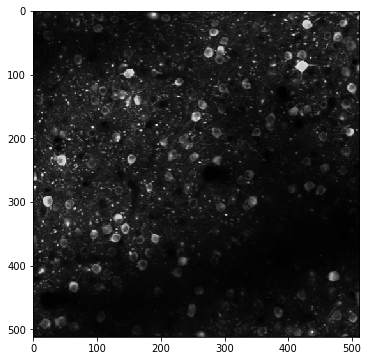

In [17]:
fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

## ROI Masks

These are all of the segmented masks for cell bodies in this experiment.

In [18]:
rois = data_set.get_roi_mask_array()

In [19]:
print rois.shape
print "Number of cells:", rois.shape[0]

(174L, 512L, 512L)
Number of cells: 174


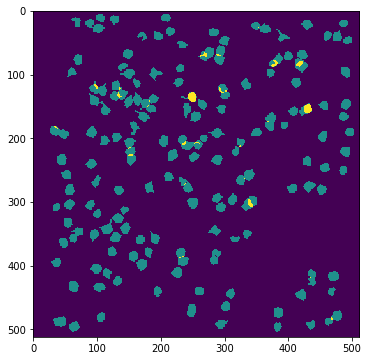

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

## DF/F Traces

There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 


In [21]:
ts, dff = data_set.get_dff_traces()

In [22]:
dff.shape

(174L, 113888L)

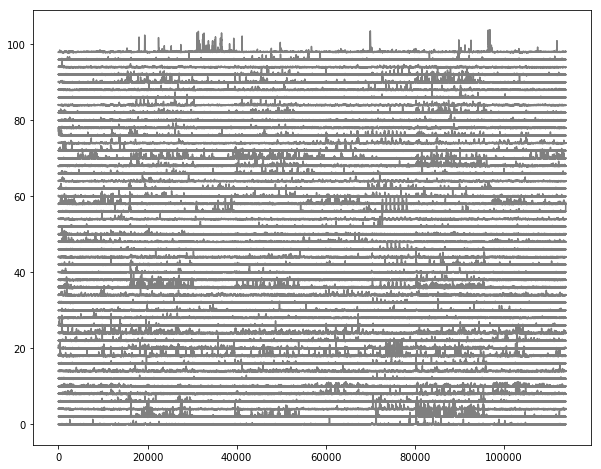

In [23]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

> It looks like different cells are active at different times. What could that be about?

## Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs

In [24]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [25]:
stim_epoch

,stimulus,start,end
0,static_gratings,746,15195
1,natural_scenes,16099,30550
2,spontaneous,30700,39580
3,natural_scenes,39581,54049
4,static_gratings,54952,69402
5,natural_movie_one,70306,79337
6,natural_scenes,80240,96125
7,static_gratings,97405,113661


> Let's overlay stimulus epochs on the DFF traces

In [26]:
stim_epoch.stimulus.unique()

array([u'static_gratings', u'natural_scenes', u'spontaneous',
       u'natural_movie_one'], dtype=object)

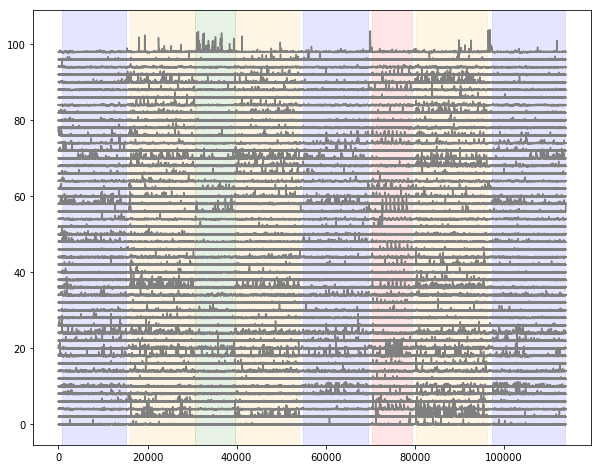

In [27]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

> Details of stimulus presentation per trial can be found in the stimulus_table and the images and movies presented can be found in the stimulus_template

## Stimulus Table

For each stimulus there is a stimulus table with information about the condition and timing of each trial. 


In [28]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [29]:
natural_scene_table.head()

,frame,start,end
0,81,16099,16106
1,33,16107,16114
2,76,16114,16121
3,13,16122,16129
4,56,16129,16136


## Stimulus Template

The images and movies presented during the session area also included in the NWB file as the stimulus template. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.


In [30]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [31]:
natural_scene_template.shape

(118L, 918L, 1174L)

> Look at the scene presented for the first trial

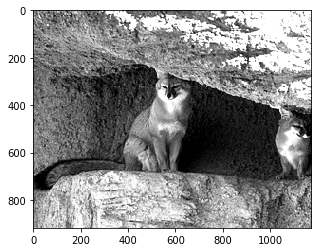

In [32]:
scene_number = natural_scene_table.frame.loc[3]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

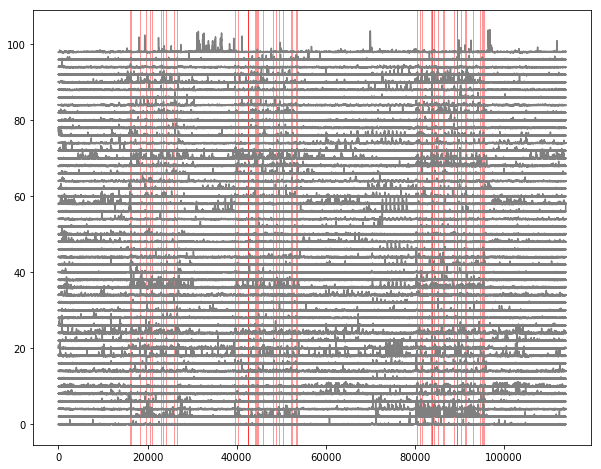

In [33]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

## Running speed

The running speed of the animal on the rotating disk during the entire session.


In [34]:
dxcm, tsd = data_set.get_running_speed()

Text(0,0.5,'Running speed (cm/s)')

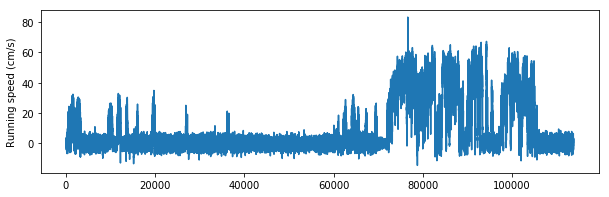

In [35]:
fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")

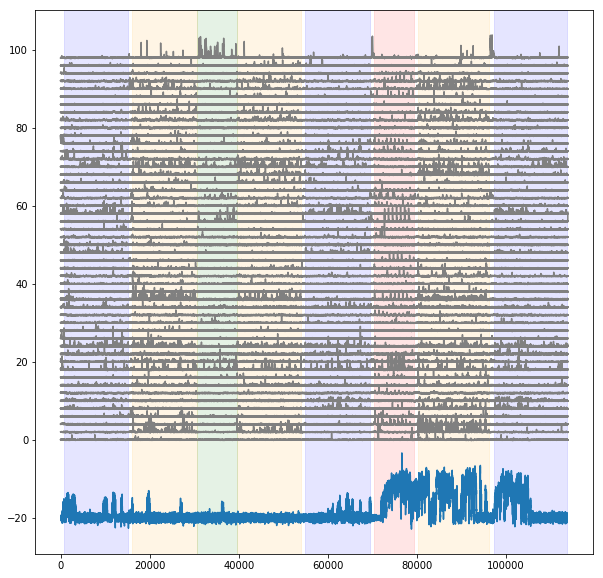

In [36]:
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

## Cell Specimens Table

The `Cell Specimens Table` is a table of metadata and derived metrics computed for each ROI in the entire dataset. This is accessible for direct download from the website and through the sdk.

In [37]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [38]:
cell_specimens.shape

(37091, 60)

In [39]:
cell_specimens.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISpm,517394847,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.852081,511498500,False,0.468690,0.275754,NaN,...,503292439,0.348821,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISpm,517394850,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.730537,0.342070,NaN,...,503292439,0.298012,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISpm,517394854,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.692137,511498500,False,0.319382,0.215510,NaN,...,503292439,0.380637,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISpm,517394858,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,NaN,NaN,0.76123,...,503292439,NaN,0.4655,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISpm,517394862,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.391861,0.742900,NaN,...,503292439,0.330543,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


> There are 60 columns in this dataframe. Some are metadata, including experiment id, cell_specimen_id, Cre line, targeted area, etc. Others are derived metrics including orientation selectivity, preferred stimulus conditions, receptive field size and location, response reliability, etc. The details on how these are computed are in the White Paper in the `Documentation` Tab on the website.

In [40]:
cell_specimens.keys()

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

> Let's find the cells from our experiment above

In [41]:
subset = cell_specimens[cell_specimens.experiment_container_id==experiment_container_id]

In [42]:
len(subset)

225

> Why are there more cells that we saw in the ROI masks above?

> Let's look at the cells in this experiment that have image #22 (below) as their preferred image.

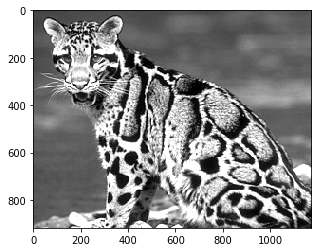

In [43]:
plt.imshow(natural_scene_template[22,:,:], cmap='gray')

In [44]:
subset[(subset.p_ns<0.05)&(subset.pref_image_ns==22)].cell_specimen_id

5796     517472708
6013     517474078
32725    587377366
Name: cell_specimen_id, dtype: int64

In [45]:
cell_index = data_set.get_cell_specimen_indices([587377366])[0]

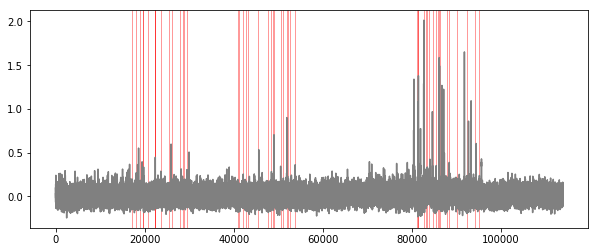

In [46]:
fig = plt.figure(figsize=(10,4))
plt.plot(dff[cell_index,:], color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

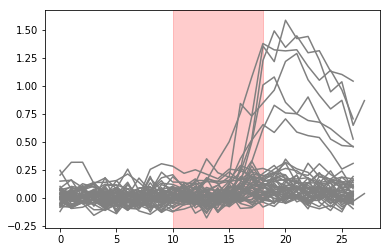

In [47]:
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-10:stim_subset.end.iloc[i]+10], color='gray')
plt.axvspan(10,18, color='red',alpha=0.2)

## Analysis modules: NaturalScenes

The AllenSDK provides a set of objects that facilitate the analysis of specific stimulus classes. We initialize the analysis objects by passing in a dataset instance.

In [48]:
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)

The NaturalScenes analysis object has an attribute `stim_table` that returns a pandas dataframe where each row corresponds to a single presentation of a Natural Scenes image.

- "frame" is the identify of the image (that is, the frame of the image stack)
- "start" is the first frame of the calcium trace where this image was presented
- "end" is the final frame (inclusive) of the calcium trace where this image was presented

In [49]:
ns.stim_table.head()

,frame,start,end
0,81,16099,16106
1,33,16107,16114
2,76,16114,16121
3,13,16122,16129
4,56,16129,16136


The `mean_sweep_response` attribute returns a pandas dataframe where each row is a trial. Each column is a neuron from the dataset and the values are the average response of the neuron on a given trial.

In [50]:
msr = ns.mean_sweep_response
msr.drop('dx', axis=1, inplace=True) # <- let's drop running speed
msr.head()

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.192233,-0.420089,-1.288674,-12.459207,4.932441,-0.586292,-0.491726,-3.215213,0.188219,3.415931,...,-0.170907,0.651911,-11.732939,-1.001725,-0.435239,9.450917,3.613132,-0.511247,-2.402879,3.794531
1,8.592971,6.759204,1.958614,13.067665,15.090590,9.869390,3.796411,0.713464,6.830234,10.030153,...,2.881454,7.561196,-10.546605,10.678099,5.220563,18.394426,7.640479,3.837485,5.116742,10.675797
2,8.322078,9.363954,5.586579,21.384277,15.888893,14.216713,7.251873,4.965381,15.275980,2.016711,...,5.970247,6.363598,6.829888,17.669106,6.911397,7.079736,9.533689,6.686839,6.628520,10.839546
3,4.129842,9.715932,10.234195,1.755771,12.801437,11.534079,3.195124,32.923992,10.828713,-4.660487,...,2.259489,1.361992,14.452542,10.462985,3.317308,1.756837,9.260286,8.563982,0.971584,3.981032
4,-3.458401,1.896320,6.964955,71.487015,4.590652,1.297327,4.152704,35.202595,9.380411,-6.322717,...,-0.764914,1.749727,2.986821,-1.600438,1.680690,-0.607693,3.078282,8.754712,2.661256,-0.823247


## Decoding image identity from the population response

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
Xr = pca.fit_transform(msr)
print(Xr.shape)

(5950L, 2L)


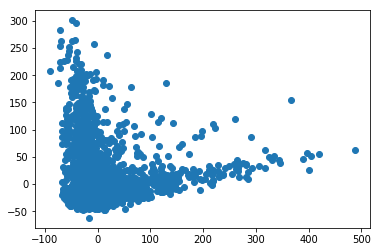

In [53]:
plt.scatter(Xr[:,0],Xr[:,1])

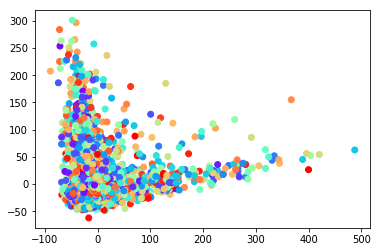

In [55]:
images = ns.stim_table['frame']
plt.scatter(Xr[:,0],Xr[:,1],c=images.values,cmap='rainbow')

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
classifier = KNeighborsClassifier(n_neighbors=10)

In [58]:
from sklearn.cross_validation import cross_val_score

C:\Users\justink\AppData\Local\Continuum\Anaconda2\envs\allensdk\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
scores = cross_val_score(
    estimator=classifier,
    X=msr,
    y=images,
    cv=5,
)

In [60]:
print(scores.mean() * len(images.unique()))

5.68
